In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

#my libraries
import sys
sys.path.append("../code")

import myUtilities

import importlib
importlib.reload(myUtilities)


<module 'myUtilities' from 'd:\\education\\sem 9 SIGMA\\convex optimization\\lab 3\\notebooks\\../code\\myUtilities.py'>

In [10]:
original = cv.resize(cv.imread("../resources/babun.png",0), (256, 256))
reconstructed = cv.imread("../tests/babun_256_0.5_BSDR.jpeg",0)
#myUtilities.plot_2_images_side_by_side(original,reconstructed)
print(myUtilities.MSE(original/255,reconstructed/255))

0.02024174896674356


MSE and NMSE

MSE direct error between two images but large diffrenses in small areas will make a diffrense   
NMSE will not be affected by the scale of the image but it doesn't take into account the visual quality

In [11]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def scores(image_name, size, noise_ratio):
    # Load images
    original = cv.resize(cv.imread(f"../resources/{image_name}.png", 0), (256, 256))
    BSDR = cv.imread(f"../tests/{image_name}_{size}_{noise_ratio}_BSDR.jpeg", 0)
    DR = cv.imread(f"../tests/{image_name}_{size}_{noise_ratio}_DR.jpeg", 0)
    Naive = cv.imread(f"../tests/{image_name}_{size}_{noise_ratio}_Naive.jpeg", 0)

    # Normalize the images by dividing by 255
    original_norm = original / 255.0
    BSDR_norm = BSDR / 255.0
    DR_norm = DR / 255.0
    Naive_norm = Naive / 255.0

    # Compute MSE (Mean Squared Error)
    BSDR_score_MSE = myUtilities.MSE(original_norm, BSDR_norm)
    DR_score_MSE = myUtilities.MSE(original_norm, DR_norm)
    Naive_score_MSE = myUtilities.MSE(original_norm, Naive_norm)

    # Compute NMSE (Normalized Mean Squared Error)
    BSDR_score_NMSE = myUtilities.NMSE(original, BSDR)
    DR_score_NMSE = myUtilities.NMSE(original, DR)
    Naive_score_NMSE = myUtilities.NMSE(original, Naive)

    # Print the results
    print(f"MSE Scores:")
    print(f"BSDR: {BSDR_score_MSE}")
    print(f"DR: {DR_score_MSE}")
    print(f"Naive: {Naive_score_MSE}")
    
    print(f"NMSE Scores:")
    print(f"BSDR: {BSDR_score_NMSE}")
    print(f"DR: {DR_score_NMSE}")
    print(f"Naive: {Naive_score_NMSE}")

    # Results as array
    mse_scores = np.array([BSDR_score_MSE, DR_score_MSE, Naive_score_MSE])
    nmse_scores = np.array([BSDR_score_NMSE, DR_score_NMSE, Naive_score_NMSE])
    
    # Plotting MSE histogram
    plt.figure(figsize=(10, 6))
    methods = ['BSDR', 'DR', 'Naive']
    plt.bar(methods, mse_scores, color=['blue', 'green', 'red'])
    plt.xlabel('Methods')
    plt.ylabel('MSE Scores')
    plt.title(f"MSE Comparison for {image_name}")
    plt.tight_layout()
    plt.show()

    # Plotting NMSE histogram
    plt.figure(figsize=(10, 6))
    plt.bar(methods, nmse_scores, color=['blue', 'green', 'red'])
    plt.xlabel('Methods')
    plt.ylabel('NMSE Scores')
    plt.title(f"NMSE Comparison for {image_name}")
    plt.tight_layout()
    plt.show()

    # Return the results arrays
    return mse_scores, nmse_scores


MSE Scores:
BSDR: 0.012568313616232337
DR: 0.015304996970065599
Naive: 0.02166073773833982
NMSE Scores:
BSDR: 2.358888353102771
DR: 1.582550089121421
Naive: 1.3104598770718288


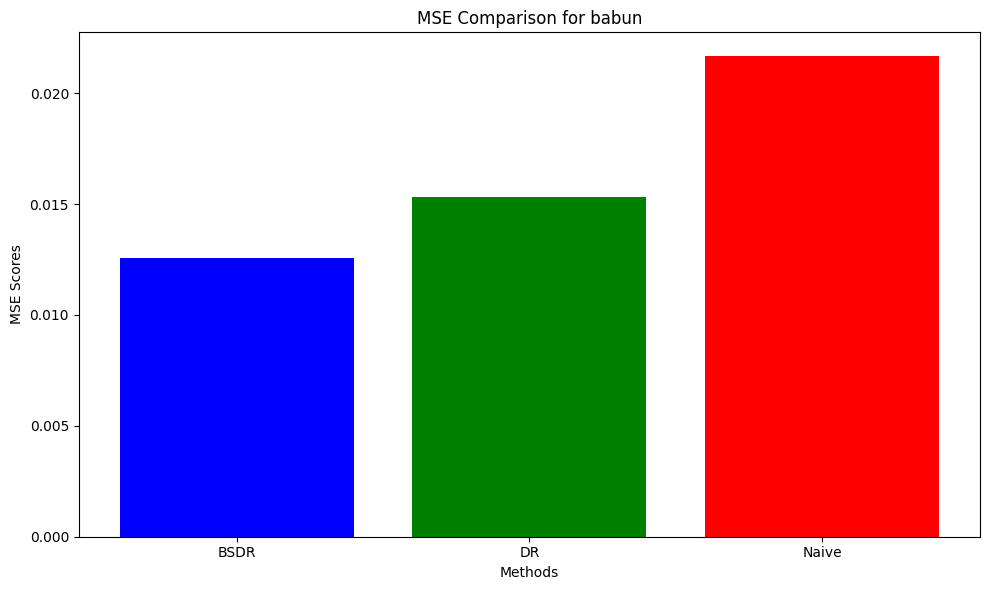

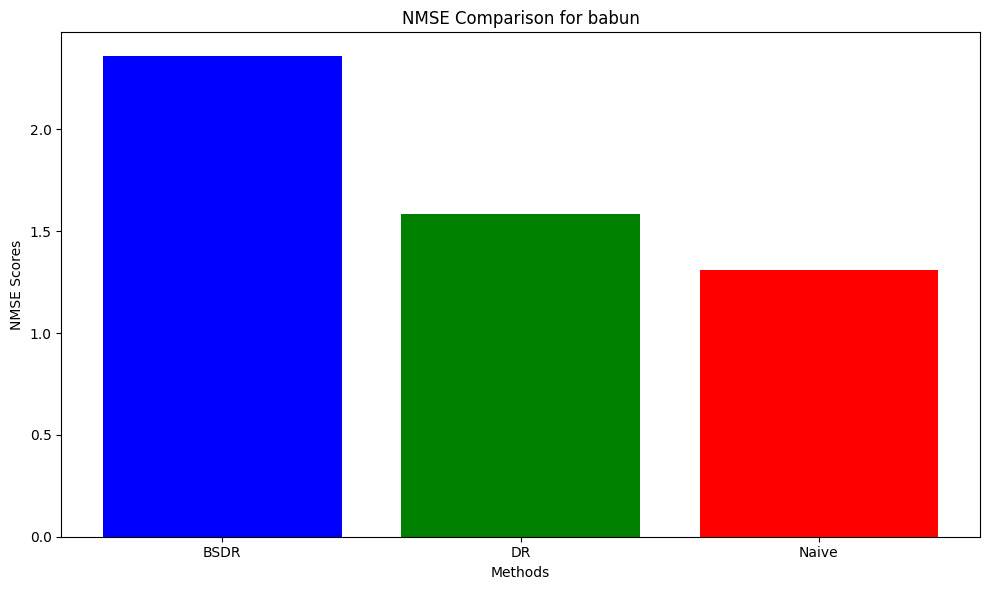

(array([0.01256831, 0.015305  , 0.02166074]),
 array([2.35888835, 1.58255009, 1.31045988]))

In [12]:
scores(image_name="babun", size=256,noise_ratio= 0.7)